## 1단계

In [1]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
import numpy as np
from hossam import load_data
import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr
from itertools import combinations

# 로지스틱 결과 판별 참조 + 머신러닝 라이브러리
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data('apple_quality')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/kaggle/apple_quality.xlsx
[desc] 이 데이터 세트는 다양한 과일 속성에 대한 정보를 담고 있어 과일의 특성을 파악하는 데 도움이 됩니다. 데이터 세트에는 과일 ID, 크기, 무게, 당도, 아삭함, 과즙량, 숙성도, 산도 및 품질과 같은 세부 정보가 포함되어 있습니다. (출처: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

field        description
-----------  ----------------------------------
A_id         각 과일에 대한 고유 식별자
Size         크기
Weight       무게
Sweetness    단맛 정도
Crunchiness  과일의 아삭한 식감을 나타내는 질감
Juiciness    과일의 과즙 함량 정도
Ripeness     과일이 익은 정도
Acidity      과일의 산도 수준
Quality      과일의 전반적인 품질

데이터셋 크기: (4000, 9)
열 개수: 9
행 개수: 4000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juic

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


## 인사이트

1. 데이터의 수: 4000개
   변수 타입: float(7), int(1), object(1)

2. size, weight, sweetness, quality 변수가 직관적으로 봤을때 주요한 요인으로 생각된다.
   그 이유는 quality 변수에 중요한 영향을 미치는 요소가 size, weight, sweetness 이 세가지로 생각되기 때문이다.

## 2단계

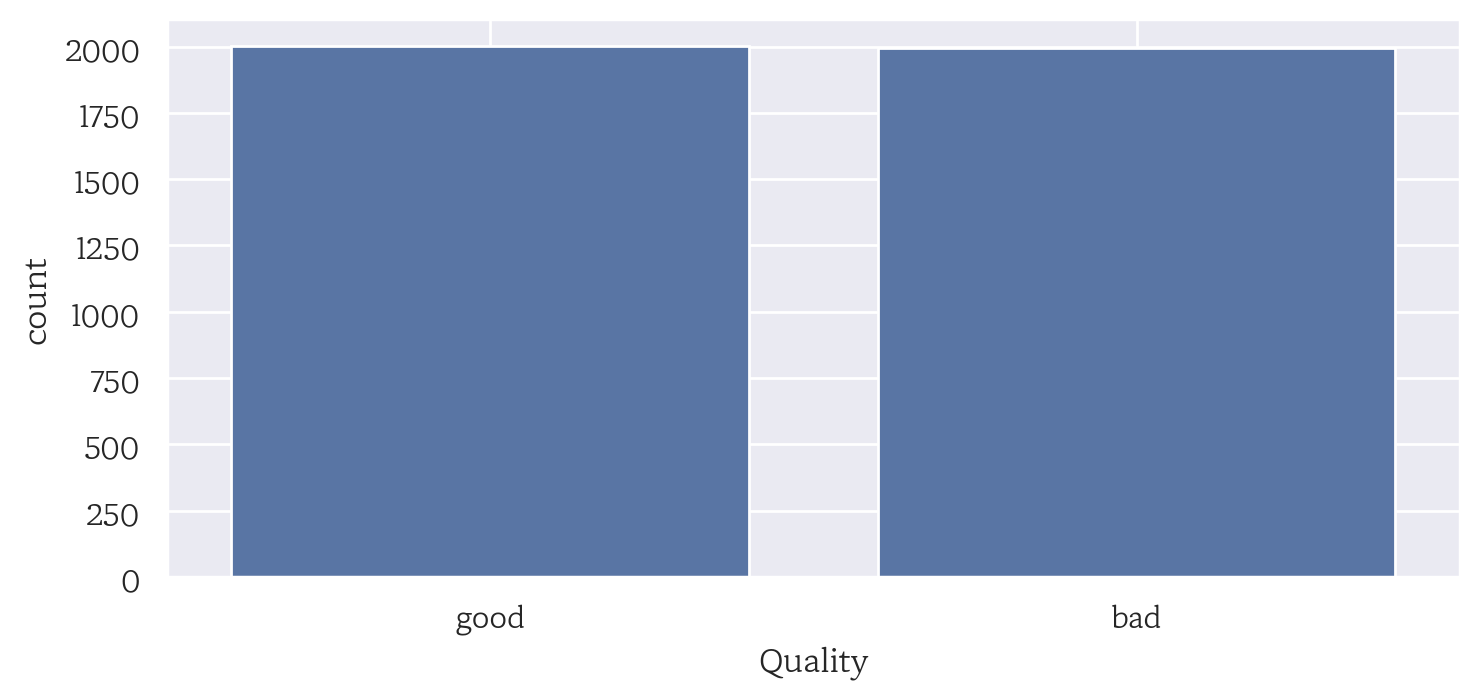

In [4]:
width_px = 1500
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# count 그리기
sb.countplot(data=origin,
             x ='Quality'
                                      
          )       

ax.grid(True)

# 출력
plt.tight_layout()
plt.show()
plt.close()

### 인사이트

Quality의 비율은 1:1
1:1 이니까 정확도 하나만으로 모델을 평가해도 될지도...?

## 3단계

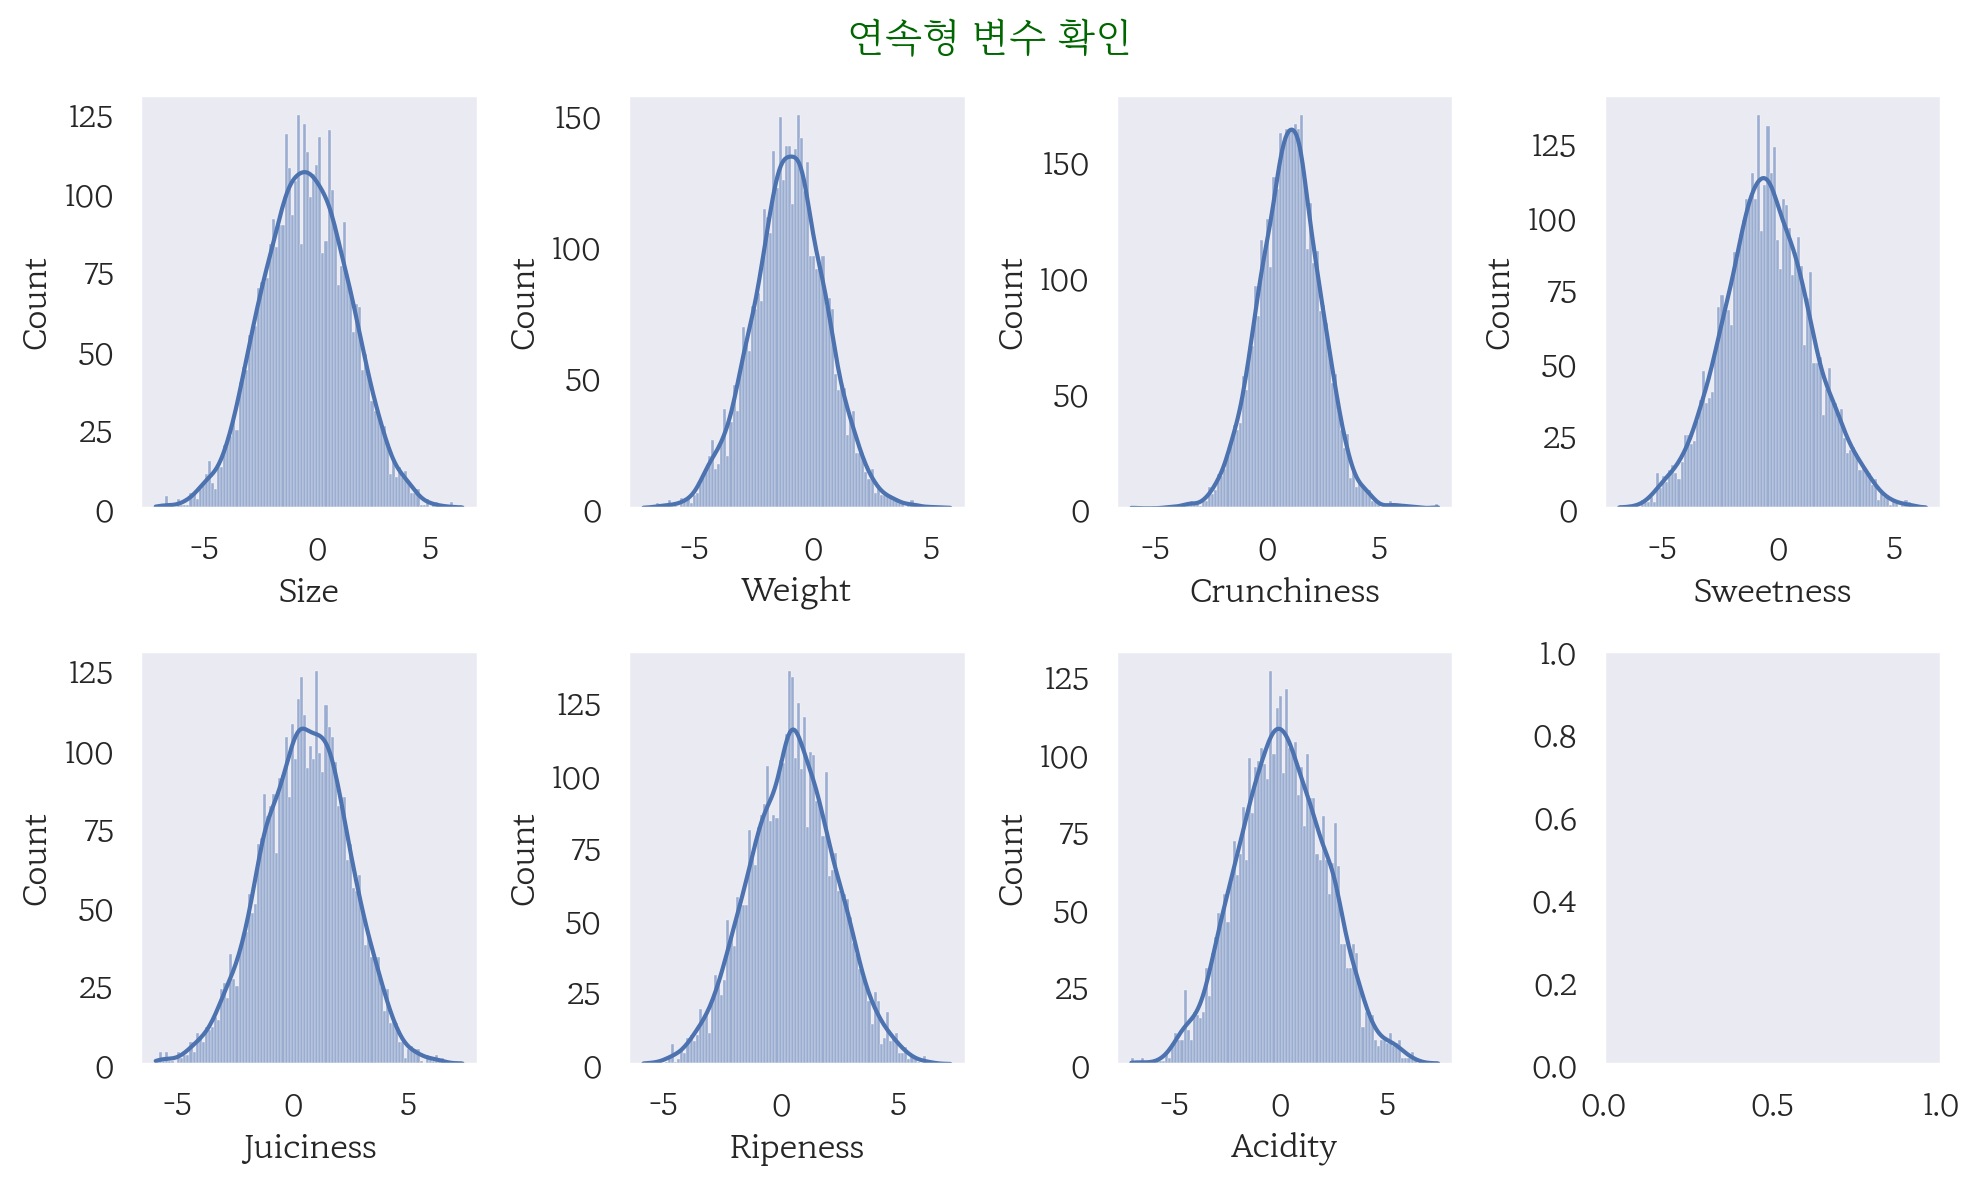

In [5]:
# plt.subplots(행,열,[figsize =(가로,세로)])
width_px = 2000
height_px = 1200
rows = 2                                                             #서브플롯 사용시 값 변경
cols = 4                                                             #서브플롯 사용시 값 변경
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


sb.histplot(data=origin, x = 'Size', kde = True, bins = 100 , ax=ax[0][0])
sb.histplot(data=origin, x = 'Weight', kde = True, bins = 100, ax=ax[0][1])
sb.histplot(data=origin, x = 'Crunchiness', kde = True, bins = 100, ax=ax[0][2])
sb.histplot(data=origin, x = 'Sweetness', kde = True, bins = 100, ax=ax[0][3])
sb.histplot(data=origin, x = 'Juiciness', kde = True, bins = 100, ax=ax[1][0])
sb.histplot(data=origin, x = 'Ripeness', kde = True, bins = 100, ax=ax[1][1])
sb.histplot(data=origin, x = 'Acidity', kde = True, bins = 100, ax=ax[1][2])

fig.suptitle('연속형 변수 확인', fontsize = 14, color ='#006600')

fig.subplots_adjust(wspace = 0.2, hspace = 0.2)


plt.tight_layout()
plt.show()
plt.close()


In [6]:
origin[['Size','Weight','Crunchiness','Sweetness','Juiciness','Ripeness','Acidity']].describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [7]:
data = origin[['Size','Weight','Crunchiness','Sweetness','Juiciness','Ripeness','Acidity']]
results = {}

for col in data.columns:
    temp = data[col]. dropna()

    # 왜도 계산
    skew_original = temp.skew()

    # z-score 기반 이상치 탐지(|z| > 3)
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3 ))

    results[col] = {
        'original_skew': skew_original,
        'outliers(|z| > 3 )': outlier_count
    }

results_df = pd.DataFrame(results).T
display(results_df)

,original_skew,outliers(|z| > 3 )
Size,-0.002437,10.0
Weight,0.003102,21.0
Crunchiness,0.000230,29.0
Sweetness,0.083850,10.0
Juiciness,-0.113421,16.0
Ripeness,-0.008764,8.0
Acidity,0.055783,8.0


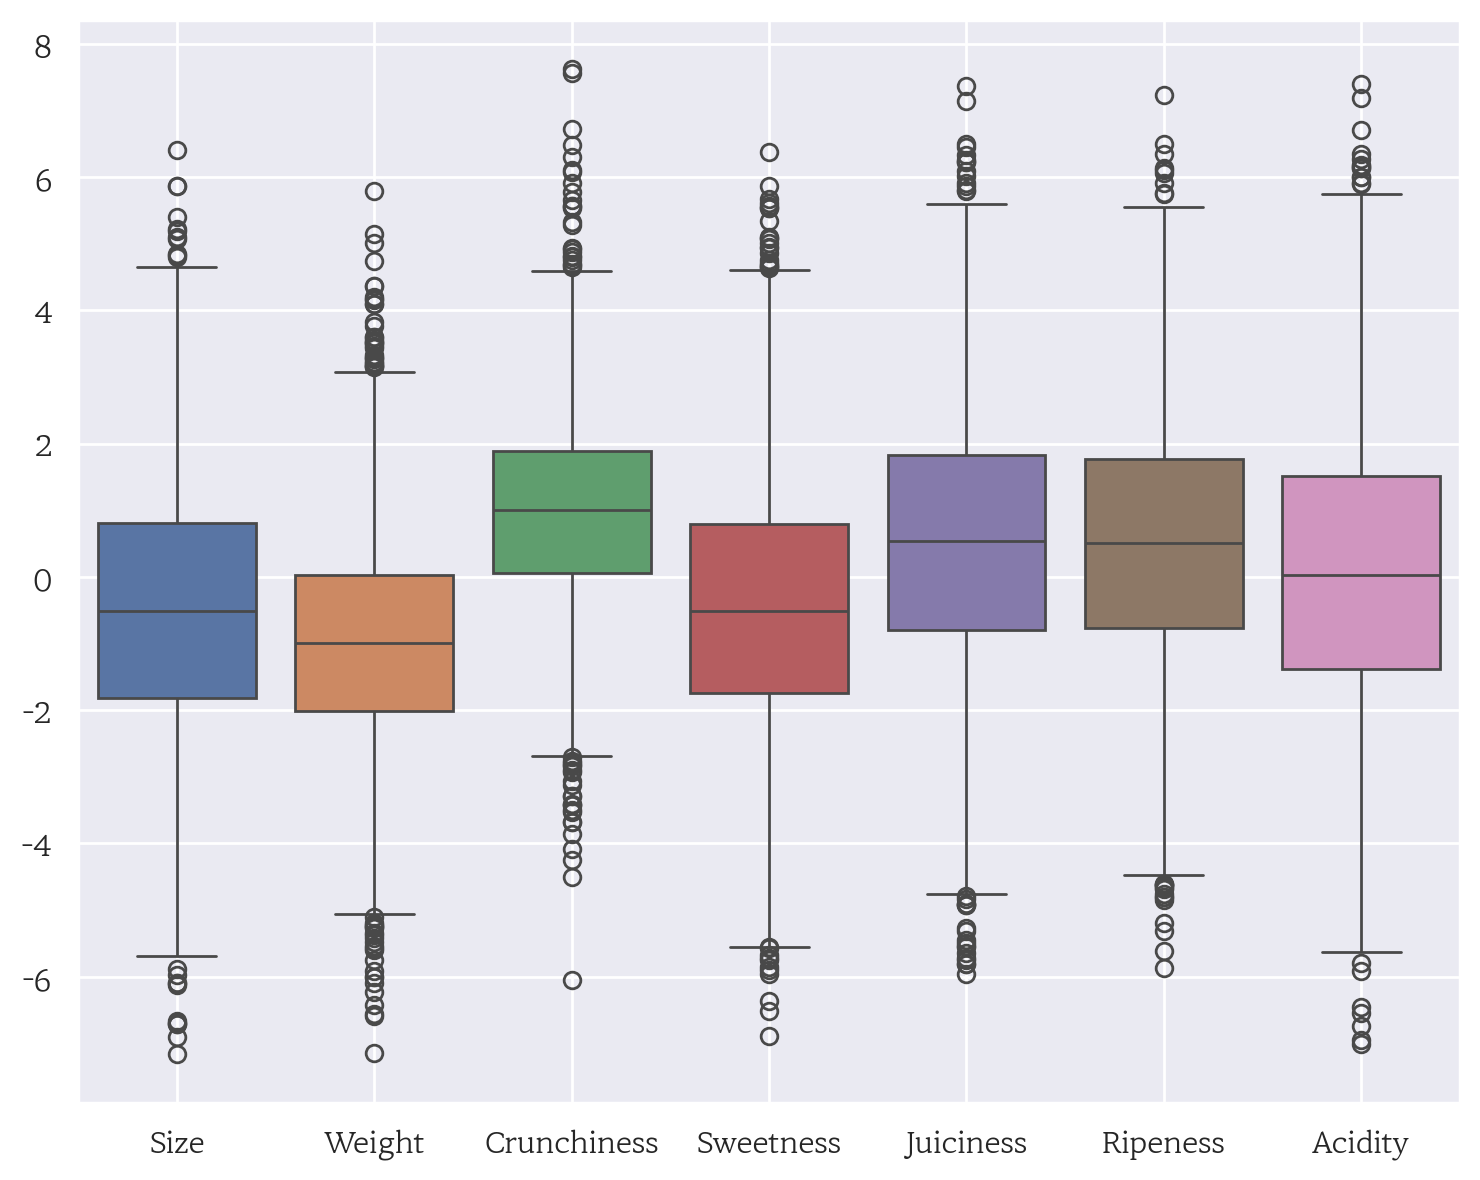

In [8]:
width_px = 1500
height_px = 1200
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=origin[['Size','Weight','Crunchiness','Sweetness','Juiciness','Ripeness','Acidity']], orient = 'v')

# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.show()
plt.close()

### 인사이트
각 변수별로 이상치는 존재하나, 전체 표본에 비해 개수가 극소수이기 때문에 그래프 상으로 정규분포에 가깝다.


## 4단계

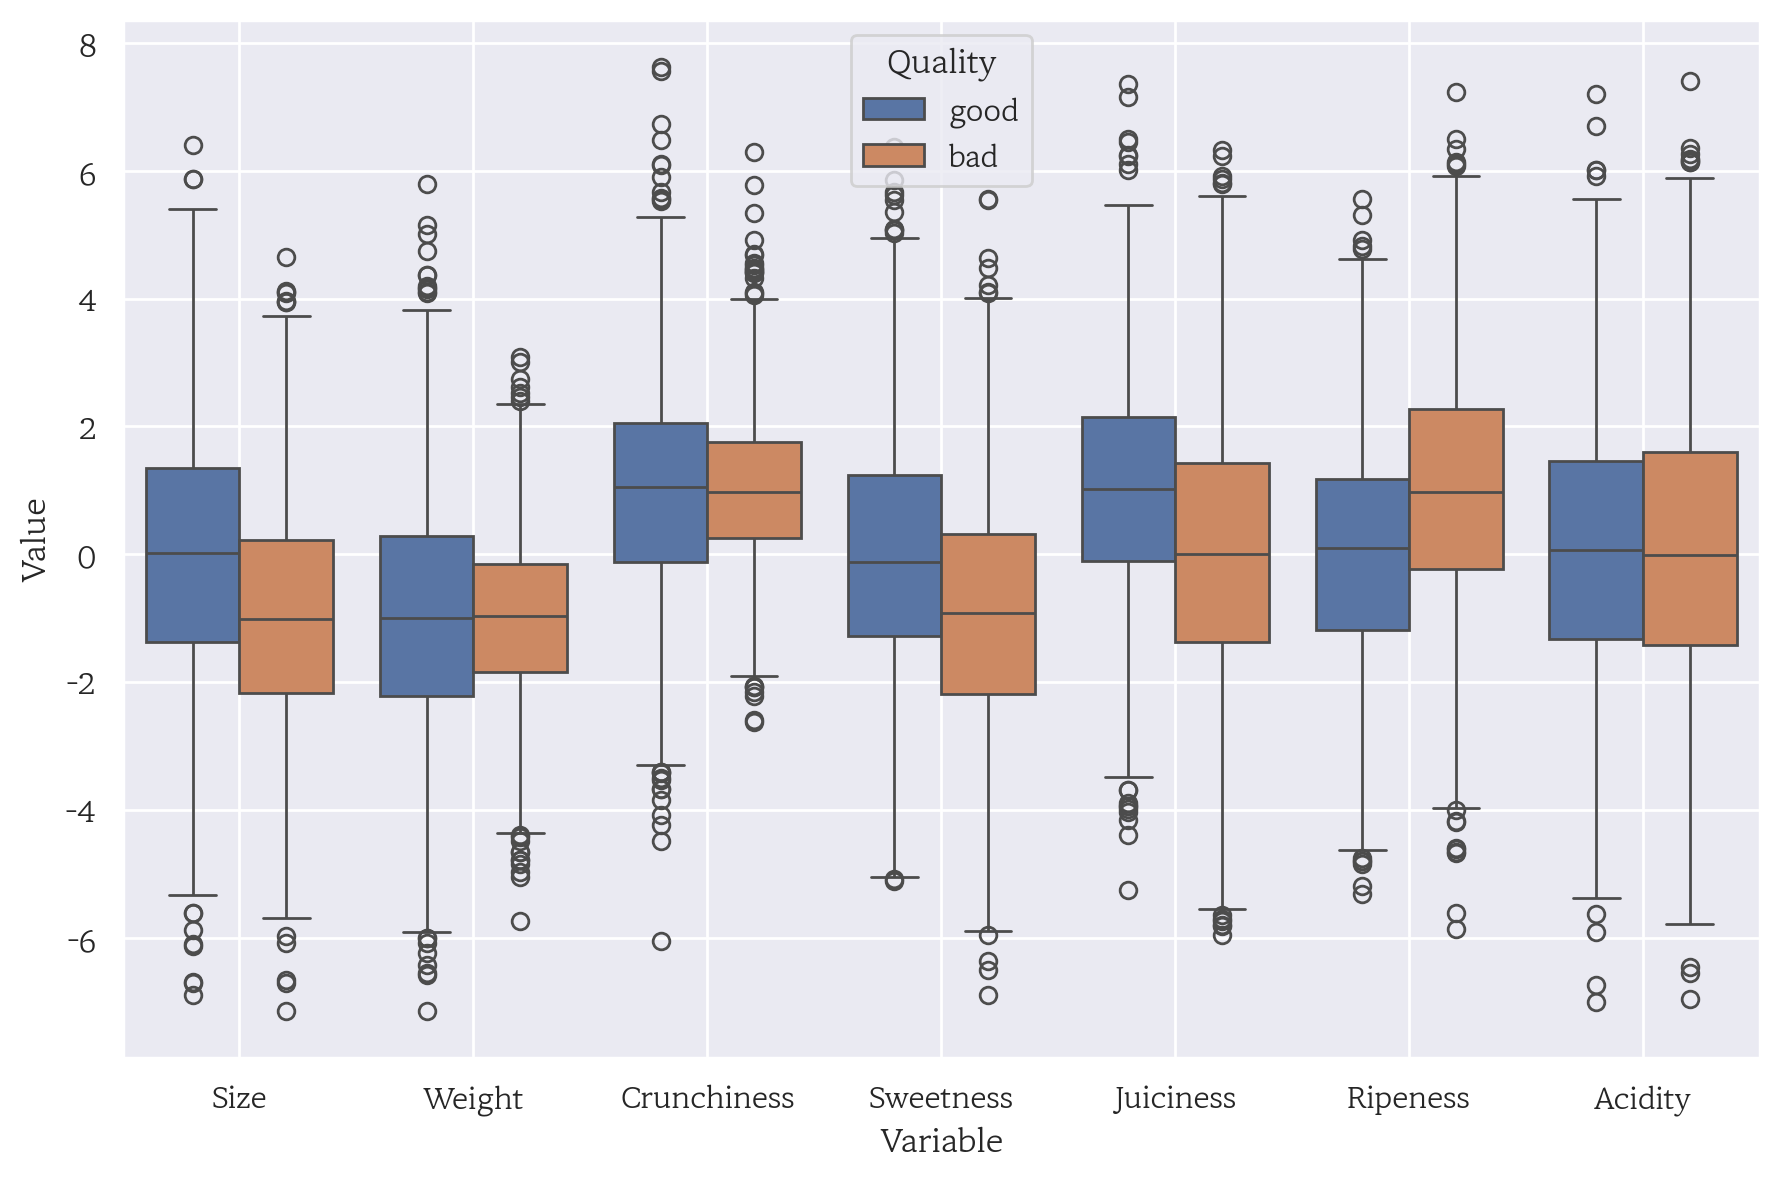

In [9]:
width_px = 1800
height_px = 1200
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

df1 = ['Size','Weight','Crunchiness','Sweetness','Juiciness','Ripeness','Acidity']

df1_form = origin.melt(
    id_vars='Quality',
    value_vars=df1,
    var_name='Variable',
    value_name='Value'
)

sb.boxplot(
    data=df1_form,
    x='Variable',
    y='Value',
    hue='Quality'
)


# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.show()
plt.close()

### 인사이트
Size, Sweetness, Juiciness, Ripeness -> 중앙값 차이 분명한 변수

Weight, Crunchiness, Acidity -> 분포가 크게 겹치는 변수

Size, Sweetness, Juiciness, Ripeness 가 Quality 별로 차이가 있다는 것을 보여주기 때문에, 분류에 도움이 될 것 같은 변수로 선정하였다.

## 5단계

In [10]:
df2 = origin.copy()
df2 = origin.drop(columns = ['Crunchiness','Acidity','Weight','A_id','Quality'])
df2

,Size,Sweetness,Juiciness,Ripeness
0,-3.970049,5.346330,1.844900,0.329840
1,-1.195217,3.664059,0.853286,0.867530
2,-0.292024,-1.738429,2.838636,-0.038033
3,-0.657196,1.324874,3.637970,-3.413761
4,1.364217,-0.384658,3.030874,-1.303849
...,...,...,...,...
3995,0.059386,-3.714549,1.697986,2.244055
3996,-0.293118,-0.204020,0.024523,-1.087900
3997,-2.634515,-2.440461,2.199709,4.763859
3998,-4.008004,2.366397,2.161435,0.214488


In [11]:
rows = []

for a, b in combinations(df2.columns, 2):
    x = df2[a]
    y = df2[b]

    # 선형성 확인(Ramsey RESET)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    reset = linear_reset(model, power = 2, use_f = True)
    linearity_ok = reset.pvalue > 0.05

    # 이상치 존재 여부(|z| > 3 기준)
    a_flag = results_df.loc[a, 'outliers(|z| > 3 )'] > 0
    b_flag = results_df.loc[b, 'outliers(|z| > 3 )'] > 0
    outlier_flag = a_flag or b_flag
    
    # 상관계수 선택 및 계산
    if linearity_ok and not outlier_flag:
        chosen = "pearson"
        corr, pval = pearsonr(x, y)
    else:
        chosen = 'spearman'
        corr, pval = spearmanr(x, y)

    # 유의성 판단 (p <= 0.05)
    significant = pval <= 0.05

    # 상관 강도 계산
    abs_r = abs(corr)
    if abs_r >= 0.80:
        strength = 'Very strong'
    elif abs_r >= 0.60:
        strength = 'Strong'
    elif abs_r >= 0.40:
        strength = 'Medium'
    elif abs_r >= 0.20:
        strength = 'Weak'
    else:
        strength = 'Very weak'
    
    # 행 추가
    rows.append({
        'var_a': a,
        'var_b': b,
        'linearity': linearity_ok,
        'outlier_flag': outlier_flag,
        'chosen': chosen,
        'corr': corr,
        'pval': pval,
        'significant': significant,
        'strength': strength
    })

summary_df = pd.DataFrame(rows)
summary_df

,var_a,var_b,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,Size,Sweetness,True,True,spearman,-0.310476,4.062856e-90,True,Weak
1,Size,Juiciness,False,True,spearman,-0.031881,4.378070e-02,True,Very weak
2,Size,Ripeness,False,True,spearman,-0.154780,7.171387e-23,True,Very weak
3,Sweetness,Juiciness,True,True,spearman,0.097540,6.338253e-10,True,Very weak
4,Sweetness,Ripeness,False,True,spearman,-0.254604,3.235950e-60,True,Weak
5,Juiciness,Ripeness,False,True,spearman,-0.124169,3.242606e-15,True,Very weak


In [12]:
# 등장하는 모든 변수 목록 추출
vars =sorted(set(summary_df['var_a']).union(summary_df['var_b']))

# 빈 상관행렬 생성 (NaN으로 초기화)
corr_matrix = pd.DataFrame(np.nan, index = vars, columns = vars)

# summary_df 내용 반영하여 대칭 행렬 채우기
for _, row in summary_df.iterrows():
    a, b, r = row['var_a'], row['var_b'], row['corr']
    corr_matrix.loc[a,b] = r
    corr_matrix.loc[b,a] = r # 대칭

# 대각선을 1로 설정
np.fill_diagonal(corr_matrix.values, 1)

corr_matrix

,Juiciness,Ripeness,Size,Sweetness
Juiciness,1.000000,-0.124169,-0.031881,0.097540
Ripeness,-0.124169,1.000000,-0.154780,-0.254604
Size,-0.031881,-0.154780,1.000000,-0.310476
Sweetness,0.097540,-0.254604,-0.310476,1.000000


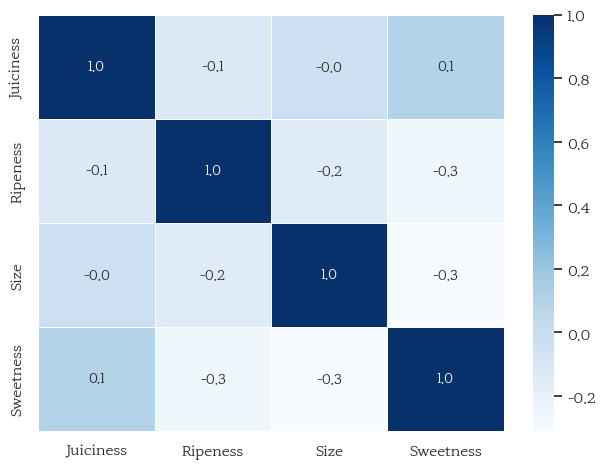

In [13]:
width_px = 1500
height_px = 1000
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)

# lmplot 그리기
sb.heatmap(data=corr_matrix, annot = True, fmt = '0.1f', linewidth = 0.5,
           cmap = 'Blues', annot_kws = {'size': 10}) 

# 출력
plt.tight_layout()
plt.show()
plt.close()

### 인사이트

만약 상관이 높은 변수들을 동시에 사용한다면, 다중공선성이 발생하여 회귀계수의 해석이 불안정해질 수 있다.

## 6 단계
### 인사이트

본 상관분석에 앞서, 5단계 변수 간 관계 탐색에서 중앙값의 차이, 분포가 겹치는 변수('Crunchiness','Acidity','Weight','Quality','A_id')는 제외하고 진행하였다.

(Juiciness, Ripeness, Size, Sweetness) 변수는 EDA 단계에서 서로 독립적 성격을 가지면서, Quality에 대해 개별적인 선형 패턴을 보였기 때문에 품질을 설명하는 데 도움이 될 것으로 판단했다.

상관분석 결과, 변수들 간에 강한 선형 또는 단조 관계는 확인되지 않았으며, 이는 변수들이 서로 중복된 정보를 많이 공유하지 않음을 시사한다.


## 7단계

In [14]:
df3 = origin[['Size','Sweetness','Juiciness','Ripeness','Quality']]
df3['Quality'] = df3['Quality'].map({'good': 1, 'bad': 0})
df3

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28456\1845768783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Quality'] = df3['Quality'].map({'good': 1, 'bad': 0})


,Size,Sweetness,Juiciness,Ripeness,Quality
0,-3.970049,5.346330,1.844900,0.329840,1
1,-1.195217,3.664059,0.853286,0.867530,1
2,-0.292024,-1.738429,2.838636,-0.038033,0
3,-0.657196,1.324874,3.637970,-3.413761,1
4,1.364217,-0.384658,3.030874,-1.303849,1
...,...,...,...,...,...
3995,0.059386,-3.714549,1.697986,2.244055,0
3996,-0.293118,-0.204020,0.024523,-1.087900,1
3997,-2.634515,-2.440461,2.199709,4.763859,0
3998,-4.008004,2.366397,2.161435,0.214488,1


In [30]:
yname = 'Quality'

x = df3.drop(yname, axis = 1)
y = df3[yname]

X = sm.add_constant(x)
display(X)

fit = sm.Logit(y, X).fit()
tbl1 = fit.summary()
print(tbl1)

,const,Size,Sweetness,Juiciness,Ripeness
0,1.0,-3.970049,5.346330,1.844900,0.329840
1,1.0,-1.195217,3.664059,0.853286,0.867530
2,1.0,-0.292024,-1.738429,2.838636,-0.038033
3,1.0,-0.657196,1.324874,3.637970,-3.413761
4,1.0,1.364217,-0.384658,3.030874,-1.303849
...,...,...,...,...,...
3995,1.0,0.059386,-3.714549,1.697986,2.244055
3996,1.0,-0.293118,-0.204020,0.024523,-1.087900
3997,1.0,-2.634515,-2.440461,2.199709,4.763859
3998,1.0,-4.008004,2.366397,2.161435,0.214488


Optimization terminated successfully.
         Current function value: 0.549771
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Quality   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3995
Method:                           MLE   Df Model:                            4
Date:                    금, 02 1 2026   Pseudo R-squ.:                  0.2068
Time:                        15:19:34   Log-Likelihood:                -2199.1
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                4.933e-247
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3491      0.042      8.349      0.000       0.267       0.431
Size           0.4718      0.

### 인사이트
- const: 0.5665 -> 절편은 모든 설명변수가 0일 때의 예측값을 의미하지만, 본 데이터에서는 해당 조건이 현실적으로 의미 없으므로 해석의 대상에서 제외한다.
- 분석 결과, (Size, Sweetness, Juiciness, Ripeness)는 통계적으로 유의한 영향을 미치는 것을 확인하였다.

## 8단계

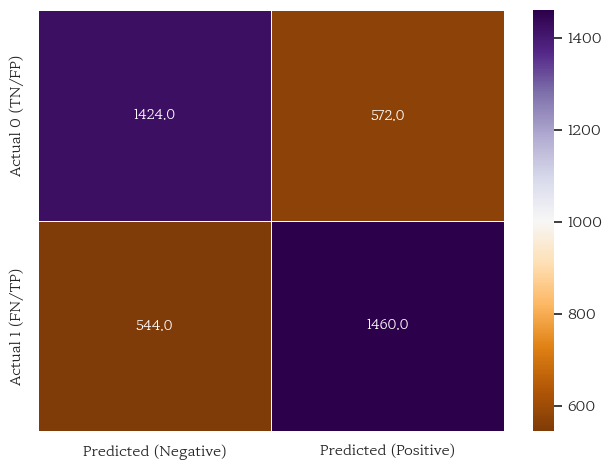

In [31]:
y_true = df3['Quality']
y_true

### 로지스틱이 예측한 값
#### 1일 확률을 의미함
y_pred = fit.predict(X)
y_pred

#### 혼동행렬을 구하기 위해 예측 결과를 이진값으로 변환
#####- 50% 초과 -> True, 아니면 False
y_pred_fix = y_pred > 0.5
y_pred_fix

#### 혼동행렬
cm = confusion_matrix(y_true, y_pred_fix)
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

#### 혼동행렬을 DataFrame으로 변환
cmdf = DataFrame(cm, index = ['Actual 0 (TN/FP)', 'Actual 1 (FN/TP)'], columns = ['Predicted (Negative)', 'Predicted (Positive)'])
cmdf

#### 혼동행렬 히트맵
width_px = 1200
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)

# lmplot 그리기
sb.heatmap(data=cmdf,annot = True, fmt = '0.1f', linewidth = 0.5, cmap = 'PuOr') # col, row 선택사항

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()

# 출력
plt.tight_layout()
plt.show()
plt.close()



In [32]:
## 오즈비 또는 승산비 구하기
### 계수 추출
coef = fit.params
coef

const        0.349147
Size         0.471842
Sweetness    0.427361
Juiciness    0.323874
Ripeness    -0.165217
dtype: float64

In [33]:
### 오즈 구하기
odds_rate = np.exp(coef)
odds_rate_df = DataFrame(odds_rate, columns = ['odds_rate'])
odds_rate_df

,odds_rate
const,1.417857
Size,1.602944
Sweetness,1.533206
Juiciness,1.382473
Ripeness,0.847709


In [34]:
### 오즈비
odds_ratio = (tp * tn) / (fp * fn)
odds_ratio

np.float64(6.681406828465652)

In [38]:
### 가상 데이터를 통한 예측
myinput = '2, 2, 0,0,'
myinput = myinput.split(',')

x_new = DataFrame([{
    'Size': int(myinput[0].strip()),
    'Sweetness': float(myinput[1].strip()),
    'Juiciness': int(myinput[2].strip()),
    'Ripeness': int(myinput[3].strip())
}])

x_new_input = sm.add_constant(x_new, has_constant = 'add')
myresult = fit.predict(x_new_input)
myresult

0    0.89544
dtype: float64

In [45]:
'4가지 변수를 고려했을 때, Apple의 Quality가 좋을 확률은 {0:0.2f}% 입니다.'.format(myresult[0]*100)

'4가지 변수를 고려했을 때, Apple의 Quality가 좋을 확률은 89.54% 입니다.'

In [46]:
'High Quality' if myresult[0] > 0.5 else 'Low Quality'

'High Quality'

### 인사이트

- 주요변수 해석 문장

  로지스틱 회귀 분석 결과, Sweetness와 Size는 Apple의 Quality가 좋을 확률에 대해 양(+)의 영향을 미치는 주요 변수로 나타났다.

  특히 Sweetness는 값이 증가할수록 Quality=1일 오즈가 증가하는 경향을 보여, 사과의 품질 판단에 있어 중요한 설명 변수임을 확인할 수 있다.

  반면 Ripeness는 다른 변수들을 통제한 상태에서 음(−)의 계수를 보여, 숙성도가 증가할수록 Quality가 좋을 확률이 감소하는 방향성을 나타냈다.

- 이 해석이 EDA 결과와 어떻게 연결되는지

  EDA 단계에서는 Sweetness와 Size가 Quality와 양의 상관관계를 보이며, 품질이 좋은 사과일수록 해당 변수들의 값이 상대적으로 높은 경향을 확인하였다.

  이러한 단변량 분석 결과는 로지스틱 회귀 분석에서도 동일하게 나타나, 두 변수는 다른 요인을 함께 고려하더라도 Quality에 대해 일관된 양의 영향을 미치는 변수임을 확인하였다. 

  반면 Ripeness의 경우 EDA에서는 Quality와 뚜렷한 양의 관계를 보였으나, 회귀 분석에서는 Juiciness와 Sweetness를 동시에 고려한 이후 음의 계수로 전환되었다.
  
  이는 Ripeness가 단독으로는 품질과 관련되어 보일 수 있으나, 다른 관능적 요인을 통제할 경우 순수한 효과는 제한적이거나 방향이 달라질 수 있음을 시사한다.

## 9단계

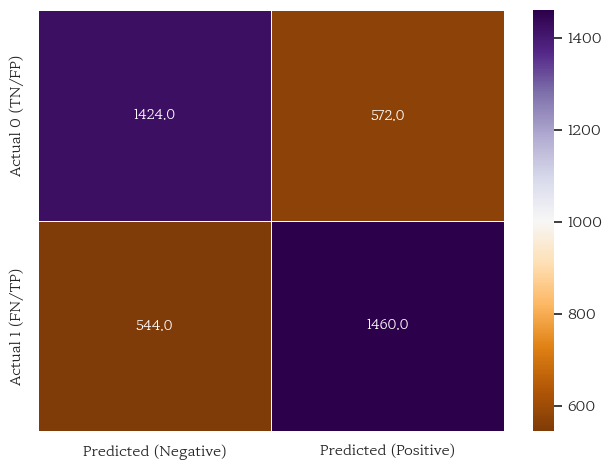

In [51]:
y_true = df3['Quality']
y_true

### 로지스틱이 예측한 값
#### 1일 확률을 의미함
y_pred = fit.predict(X)
y_pred

#### 혼동행렬을 구하기 위해 예측 결과를 이진값으로 변환
#- 50% 초과 -> True, 아니면 False
y_pred_fix = y_pred > 0.5
y_pred_fix

#### 혼동행렬
cm = confusion_matrix(y_true, y_pred_fix)
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

#### 혼동행렬을 DataFrame으로 변환
cmdf = DataFrame(cm, index = ['Actual 0 (TN/FP)', 'Actual 1 (FN/TP)'], columns = ['Predicted (Negative)', 'Predicted (Positive)'])
cmdf

#### 혼동행렬 히트맵
width_px = 1200
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)

# lmplot 그리기
sb.heatmap(data=cmdf,annot = True, fmt = '0.1f', linewidth = 0.5, cmap = 'PuOr') # col, row 선택사항

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()

# 출력
plt.tight_layout()
plt.show()
plt.close()



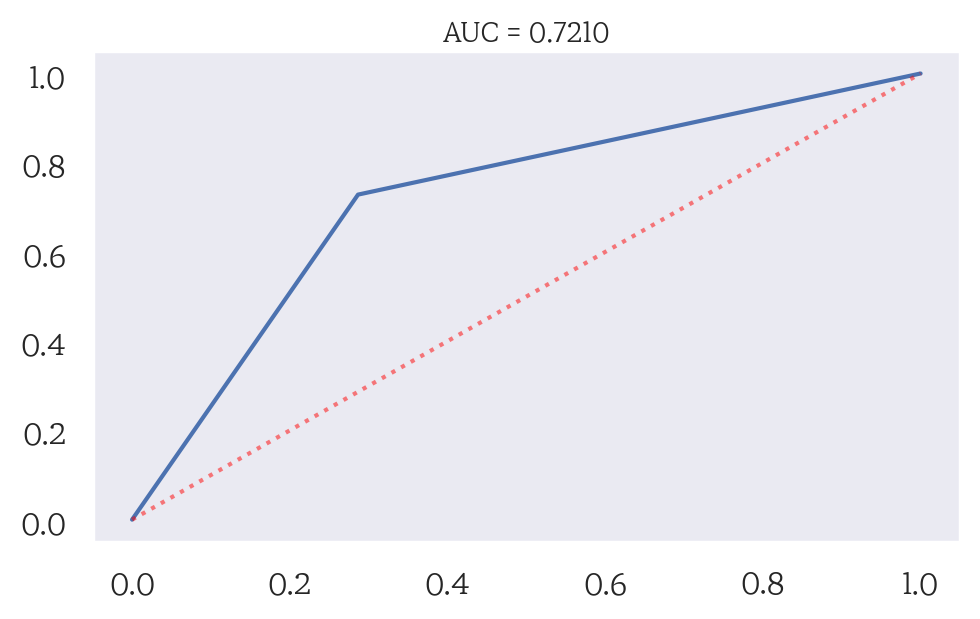

In [50]:
y_true = df3[yname]
y_prob = fit.predict(fit.model.exog)
y_pred = (y_prob >= 0.5).astype(int)

ras = roc_auc_score(y_true, y_pred)

roc_fpr, roc_tpr, thresholds = roc_curve(y_true, y_pred)

width_px = 1000
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(x= roc_fpr, y = roc_tpr)
sb.lineplot(x= [0,1], y = [0,1], color = 'red', linestyle = ':', alpha = 0.5)

# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김
ax.set_title(f'AUC = {ras:.4f}', pad = 4, fontsize = 10)


# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

### 인사이트
- 로지스틱 회귀모형의 AUC는 0.721으로, 사과 품질을 양호 여부에 따라 구분하는 데 있어 수용 가능한 수준의 판별 성능을 보이는 것으로 해석할 수 있다.

## 10단계



In [55]:
apple_A = DataFrame([{
    'Size': 2,
    'Sweetness': 2,
    'Juiciness': 0,
    'Ripeness': 0
}])

# 사과 B (Quality가 상대적으로 낮을 것으로 예상)
apple_B = DataFrame([{
    'Size': 0,
    'Sweetness': 1,
    'Juiciness': 0,
    'Ripeness': 0
}])

# 상수항 추가
apple_A_input = sm.add_constant(apple_A, has_constant='add')
apple_B_input = sm.add_constant(apple_B, has_constant='add')

In [56]:
prob_A = fit.predict(apple_A_input)[0]
prob_B = fit.predict(apple_B_input)[0]

prob_A, prob_B

(np.float64(0.895439845615184), np.float64(0.6849269262586348))

In [57]:
print(f"사과 A의 Quality가 좋을 확률: {prob_A*100:.2f}%")
print(f"사과 B의 Quality가 좋을 확률: {prob_B*100:.2f}%")

사과 A의 Quality가 좋을 확률: 89.54%
사과 B의 Quality가 좋을 확률: 68.49%


### 인사이트

서로 다른 두 개의 사과의 'Size','Sweetness'값만 다르게 설정한 뒤, 로지스틱 회귀 모델을 적용하여 예측 확률을 비교하였다.

EDA 단계에서 해당변수들은 'Quality'와 양(+)의 관계를 보였고, 회귀계수에서도 양(+)의 방향으로 보였기 때문에, 

해당 변수의 값이 더 큰 apple_A의 Quality의 예측 확률이 더 높게 측정되었다.